<div style="background-color:#7B68EE; color:white; padding:15px; text-align:center; border-style: solid;
            border-color: #FF9B50;
            font-size:24px; font-weight:bold; border-radius:14px;">
    <span style="font-size:40px;">🧠</span> Brain Stroke Prediction
</div>

<div style="text-align: center;">
    <img src="https://my.clevelandclinic.org/-/scassets/images/org/patient-experience/patient-stories/173-advanced-stroke-procedure-saves-patient-after-deep-brain-bleed/deep-brain-bleeds-new-2.gif" 
    alt="Brain Stroke" style="width: 80%; height: auto;">
</div>





<div style="background-color:#7B68EE; color:white; padding:15px; border-style: solid;
            border-color: #FF9B50;
            font-size:30px; font-weight:bold; border-radius:14px;">
    <span style="font-size:40px;">Data info</span> 🧾
</div>

<div style="background-color:#7B68EE; color:white; padding:15px; border-style: solid;
            border-color: #FF9B50;
            font-size:29px; font-weight:bold; border-radius:14px;">
    <span style="font-size:40px;">Import libraries</span> 📚
</div>


In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

<div style="background-color:#7B68EE; color:white; padding:20px; border-style: solid;
            border-color: #FF9B50;
            font-size:25px; font-weight:bold; border-radius:14px;">
    <span style="font-size:40px;">Read Dataset</span> 🐼📄
</div>


# first dataset 🧠

In [8]:
## first dataset
df1=pd.read_csv(r"C:\Users\Ahmed Okasha\Downloads\stroke_data(40k,11).csv")

In [9]:
df1.head(10)

sex   age  hypertension  heart_disease  ever_married  work_type  \
0  1.0  63.0             0              1             1          4   
1  1.0  42.0             0              1             1          4   
2  0.0  61.0             0              0             1          4   
3  1.0  41.0             1              0             1          3   
4  1.0  85.0             0              0             1          4   
5  1.0  55.0             1              1             1          4   
6  0.0  82.0             0              0             0          4   
7  0.0  17.0             1              0             1          4   
8  1.0  31.0             0              1             1          2   
9  0.0  55.0             0              0             1          4   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               1             228.69  36.6               1       1  
1               0             105.92  32.5               0       1  
2               1             171.23  34.4               1       1  
3               0             174.12  24.0               0       1  
4               1             186.21  29.0               1       1  
5               0              70.09  27.4               0       1  
6               1              94.39  22.8               0       1  
7               0              80.43  29.7               0       1  
8               0             120.46  36.8               1       1  
9               1             104.51  27.3               1       1

# second dataset 🧠

In [11]:
# second dataset
df2=pd.read_csv(r"C:\Users\Ahmed Okasha\Downloads\healthcare-dataset-stroke-data.csv")
df2.drop(columns='id',inplace=True)
df2.rename(columns={'gender':'sex'},inplace=True)


In [12]:
df2.head(10)

sex   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   
5    Male  81.0             0              0          Yes        Private   
6    Male  74.0             1              1          Yes        Private   
7  Female  69.0             0              0           No        Private   
8  Female  59.0             0              0          Yes        Private   
9  Female  78.0             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             202.21   NaN     never smoked       1  
2          Rural             105.92  32.5     never smoked       1  
3          Urban             171.23  34.4           smokes       1  
4          Rural             174.12  24.0     never smoked       1  
5          Urban             186.21  29.0  formerly smoked       1  
6          Rural              70.09  27.4     never smoked       1  
7          Urban              94.39  22.8     never smoked       1  
8          Rural              76.15   NaN          Unknown       1  
9          Urban              58.57  24.2          Unknown       1

<div style="background-color:#7B68EE; color:white; padding:20px; border-style: solid;
            border-color: #FF9B50;
            font-size:25px; font-weight:bold; border-radius:14px;">
    <span style="font-size:40px;">modify d2 to match d1</span> 🔄📄➡️📄
</div>




In [14]:

def transform_sex(df):
    if df['sex']=='Male' :
      return 1
    elif df['sex']=='Female' :
        return 0
    else:
        return 'unknown'
        
def transform_ever_married(df):
    if df['ever_married']=='Yes' :
      return 1
    elif df['ever_married']=='No' :
        return 0
    else:
        return 'unknown'

def transform_work_type(df):
    if df['work_type']=='Never_worked' :
       return 0
    elif df['work_type']=='children' :
        return 1
    elif df['work_type']=='Govt_job' :
        return 2
    elif df['work_type']=='Self-employed' :
        return 3
    elif df['work_type']=='Private' :
        return 4     
    else:
        return 'unknown'

def transform_smoking_status(df):
    if df['smoking_status']=='never smoked' :
      return 0
    elif (df['smoking_status']=='formerly smoked') |( df['smoking_status']=='smokes' ):
        return 1
        
    else:
        return 'unknown'
        
def transform_Residence_type(df):
    if df['Residence_type']=='Urban' :
      return 1
    elif df['Residence_type']=='Rural' :
        return 0
    else:
        return 'unknown'        

In [15]:
df2['sex']=df2.apply(transform_sex,axis=1)
df2['ever_married']=df2.apply(transform_ever_married,axis=1)
df2['work_type']=df2.apply(transform_work_type,axis=1)
df2['smoking_status']=df2.apply(transform_smoking_status,axis=1)
df2['Residence_type']=df2.apply(transform_Residence_type,axis=1)



In [16]:
df2.head()

sex   age  hypertension  heart_disease  ever_married  work_type  \
0   1  67.0             0              1             1          4   
1   0  61.0             0              0             1          3   
2   1  80.0             0              1             1          4   
3   0  49.0             0              0             1          4   
4   0  79.0             1              0             1          3   

   Residence_type  avg_glucose_level   bmi smoking_status  stroke  
0               1             228.69  36.6              1       1  
1               0             202.21   NaN              0       1  
2               0             105.92  32.5              0       1  
3               1             171.23  34.4              1       1  
4               0             174.12  24.0              0       1

<div style="padding:10px;
            color:#FF0000;
            margin:10px;
            font-size:180%;
            display:fill;

            background-color:#FFFFFF;
            overflow:hidden;
            font-weight:400"><b> now d2 match d1 </b></div>


<div style="padding:10px;
            color:#E55604;
            margin:10px;
            font-size:200%;
            font-weight:400"><b> Now d2 match d1 ✅📄=📄 </b></div>


<div style="background-color:#7B68EE; color:white; padding:20px; border-style: solid;
            border-color: #FF9B50;
            font-size:25px; font-weight:bold; border-radius:14px;">
    <span style="font-size:40px;">merge d1 & d2</span> 📄+📄=📄
</div>


In [20]:
## combine the  DataFrame
df = pd.concat([df1,df2])
df.sample(10)

sex   age  hypertension  heart_disease  ever_married  work_type  \
3101   1.0  18.0             0              0             1          3   
14300  0.0  26.0             0              0             1          4   
5010     0  72.0             0              0             1          3   
16351  1.0  50.0             0              0             1          3   
32797  1.0  50.0             0              0             1          4   
36453  0.0  83.0             1              0             1          4   
18731  1.0  96.0             1              1             1          4   
33541  1.0  68.0             0              0             1          4   
32102  0.0  40.0             0              0             1          2   
2270   1.0  61.0             0              0             0          3   

       Residence_type  avg_glucose_level   bmi smoking_status  stroke  
3101                1              74.96  26.6              0       1  
14300               0              93.72  30.2              1       1  
5010                1              74.17  35.5              1       0  
16351               0              81.95  16.9              0       1  
32797               1              87.40  24.5              1       0  
36453               0             213.37  36.0              0       0  
18731               1             250.89  28.1              1       1  
33541               0              91.45  24.2              0       0  
32102               1             148.72  28.7              0       0  
2270                1              68.02  37.5              0       1

<div style="background-color:#7B68EE; color:white; padding:20px; border-style: solid;
            border-color: #FF9B50;
            font-size:25px; font-weight:bold; border-radius:14px;">
    <span style="font-size:40px;">Data Exploration</span> 🔍📊
</div>


## shape 📐

In [23]:
# shape
df.shape

(46020, 11)

## information ℹ️

In [25]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46020 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                46017 non-null  object 
 1   age                46020 non-null  float64
 2   hypertension       46020 non-null  int64  
 3   heart_disease      46020 non-null  int64  
 4   ever_married       46020 non-null  int64  
 5   work_type          46020 non-null  int64  
 6   Residence_type     46020 non-null  int64  
 7   avg_glucose_level  46020 non-null  float64
 8   bmi                45819 non-null  float64
 9   smoking_status     46020 non-null  object 
 10  stroke             46020 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 4.2+ MB


## Value Counts of Categorical Features in the Dataset 🏷️🔢


In [27]:
# Value Counts of Categorical Features in the Dataset

categorical_features = ['sex', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'smoking_status']
for col in categorical_features:
   print (df[col].value_counts())
   print(" ")

sex
1.0        24825
0.0        21191
unknown        1
Name: count, dtype: int64
 
hypertension
0    36774
1     9246
Name: count, dtype: int64
 
heart_disease
0    40519
1     5501
Name: count, dtype: int64
 
ever_married
1    36954
0     9066
Name: count, dtype: int64
 
Residence_type
1    23660
0    22360
Name: count, dtype: int64
 
smoking_status
0          22813
1          21663
unknown     1544
Name: count, dtype: int64
 


## check missing values 🚫

In [29]:
# check missing values

df.isnull().sum()

sex                    3
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## check duplication 🔁

In [31]:
## check duplication

df.duplicated().sum()

245

<div style="background-color:#7B68EE; color:white; padding:20px; border-style: solid;
            border-color: #FF9B50;
            font-size:20px; font-weight:bold; border-radius:14px;">
    <span style="font-size:26px;"> Data Cleaning: Handling Missing and Duplicate Values and  data repair</span> 🧹
</div>

## mis value treatment🛠️

In [34]:

df=df.dropna()

In [35]:
df.isnull().sum()

sex                  0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## duplication treatment 🛠️

In [37]:
# drop duplication

df = df.drop_duplicates()
df.duplicated().sum() 

0

## remove unknown value 🔍❌

In [39]:
## remove unknown value

df=df[df['sex']!= 'unknown' ]
df=df[df['smoking_status']!= 'unknown']

## convert object columns(sex & smoking_status) to numerical ✍️➡️🔢

In [41]:
## convert object columns(sex & smoking_status) to numerical

df['sex']=df['sex'].astype('float64')
df['smoking_status']=df['smoking_status'].astype('int64')

<div style="background-color:#7B68EE; color:white; padding:20px; border-style: solid;
            border-color: #FF9B50;
            font-size:30px; font-weight:bold; border-radius:14px;">
    <span style="font-size:40px;">EDA</span> 🧠📊🧐📈
</div>

##  descriptive ststistics 📋🔢

In [44]:


df.describe()

sex           age  hypertension  heart_disease  ever_married  \
count  44087.000000  44087.000000  44087.000000   44087.000000  44087.000000   
mean       0.542858     51.047860      0.206206       0.122281      0.816204   
std        0.498165     21.444611      0.404585       0.327614      0.387322   
min        0.000000     -9.000000      0.000000       0.000000      0.000000   
25%        0.000000     35.000000      0.000000       0.000000      1.000000   
50%        1.000000     52.000000      0.000000       0.000000      1.000000   
75%        1.000000     68.000000      0.000000       0.000000      1.000000   
max        1.000000    103.000000      1.000000       1.000000      1.000000   

          work_type  Residence_type  avg_glucose_level           bmi  \
count  44087.000000    44087.000000       44087.000000  44087.000000   
mean       3.459387        0.514437         120.975785     30.397228   
std        0.786474        0.499797          56.962529      6.874771   
min        0.000000        0.000000          55.120000     11.500000   
25%        3.000000        0.000000          78.480000     25.800000   
50%        4.000000        1.000000          97.760000     29.400000   
75%        4.000000        1.000000         159.835000     34.100000   
max        4.000000        1.000000         271.740000     92.000000   

       smoking_status        stroke  
count    44087.000000  44087.000000  
mean         0.486062      0.464082  
std          0.499811      0.498714  
min          0.000000      0.000000  
25%          0.000000      0.000000  
50%          0.000000      0.000000  
75%          1.000000      1.000000  
max          1.000000      1.000000

In [45]:
## number of age less than 1
(df['age']<=0).sum()

81

## number of unique values in each column 🧩🔢✨

In [47]:

unique_vals=[]
for col in df.columns:
    unival=df[col].nunique()
    unique_vals.append(unival)

#Present using  dataframe
pd.DataFrame(unique_vals,columns=['Unique_Values'],index=df.columns)

Unique_Values
sex                            2
age                          111
hypertension                   2
heart_disease                  2
ever_married                   2
work_type                      5
Residence_type                 2
avg_glucose_level           2903
bmi                          370
smoking_status                 2
stroke                         2

## "Value Counts of Categorical Features in  Dataset after remove unknown"🔢

In [49]:


categorical_features = ['sex', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'smoking_status']

value_counts_df = pd.DataFrame({col: df[col].value_counts() for col in categorical_features})

from IPython.display import display

display(value_counts_df)



sex  hypertension  heart_disease  ever_married  Residence_type  \
0.0  20154         34996          38696          8103           21407   
1.0  23933          9091           5391         35984           22680   

     smoking_status  
0.0           22658  
1.0           21429

In [50]:
colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

## Presenting the countplots for categorical features 📊

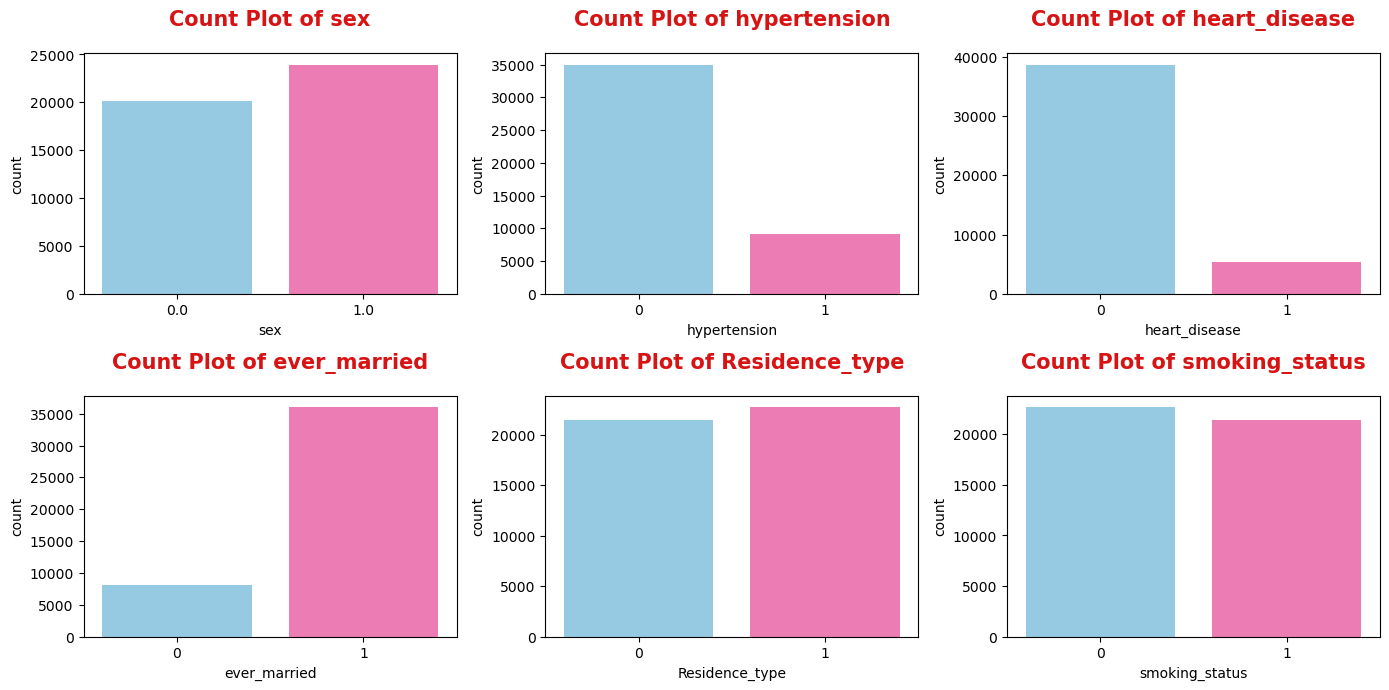

In [52]:

categorical_features = ['sex', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'smoking_status']

plt.figure(figsize=(14, 10))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col, palette=colors)
    plt.title(f"Count Plot of {col}",weight = "bold", color = "#D71313", fontsize = 15, pad=20 )
plt.tight_layout()
plt.show()

## Presenting Relationship between feature & target 🧠🔗🎯

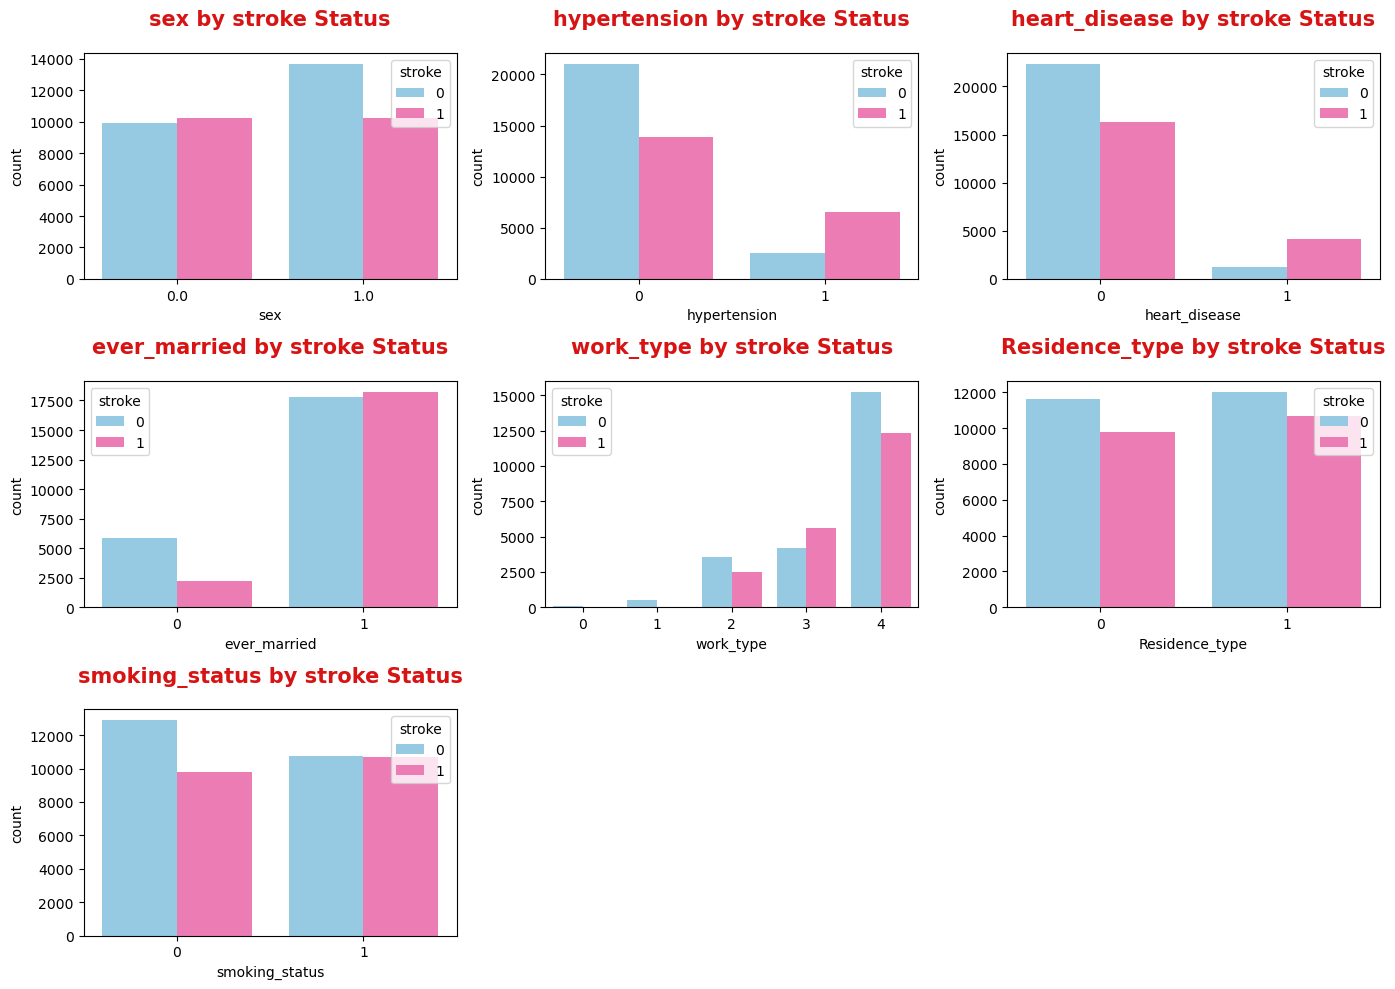

In [54]:


col=['sex', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type','smoking_status']
plt.figure(figsize=(14, 10))
for i, col in enumerate(col, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col, hue='stroke', palette=colors)
    plt.title(f"{col} by stroke Status",weight = "bold", color = "#D71313", fontsize = 15, pad=20)
plt.tight_layout()
plt.show()

## Boxplot to identify outliers 🔍📦

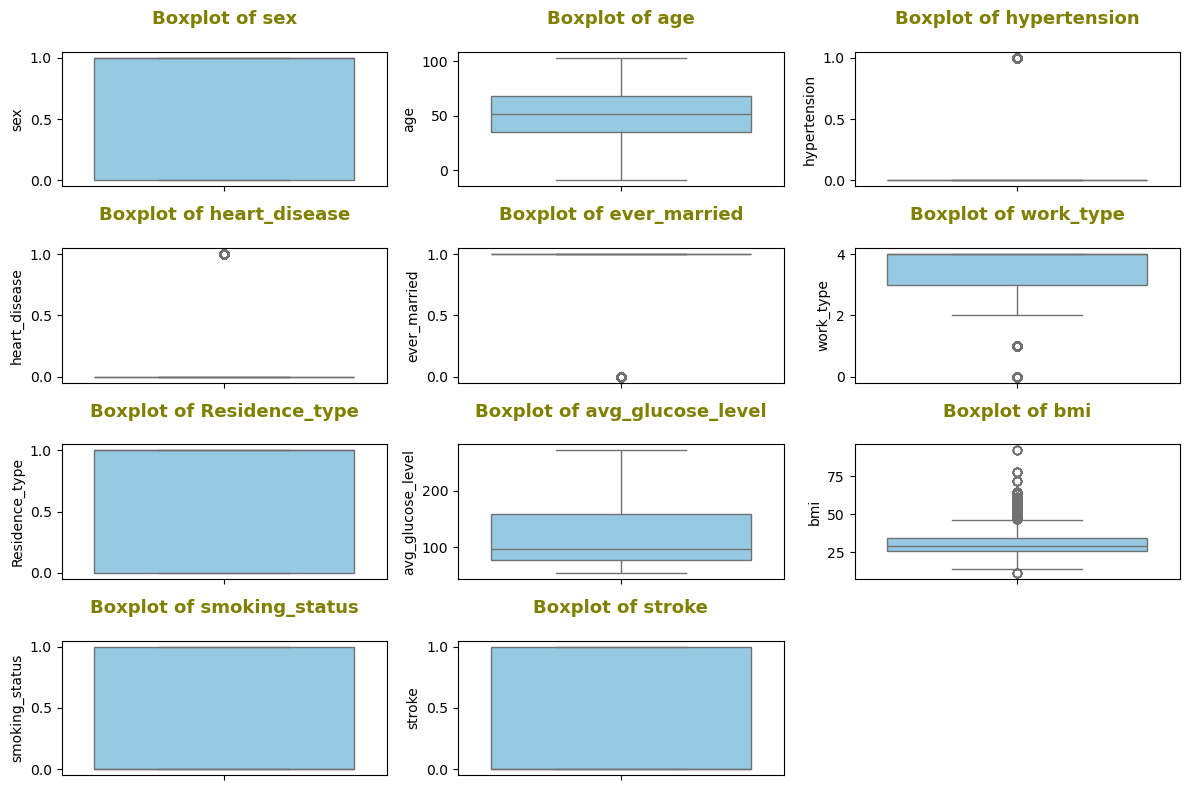

In [56]:


plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df, y=col, palette=colors)
    plt.title(f"Boxplot of {col}",weight = "bold",color='#808000', fontsize = 13, pad=20)
plt.tight_layout()
plt.show()

 ## correlation map/heatmap of numerical variables  🟩🟥🟨

<Axes: >

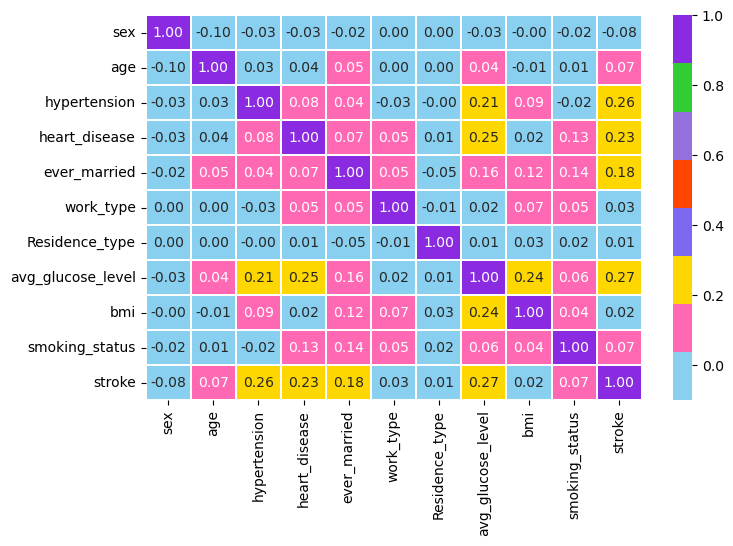

In [58]:
## correlation 
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True,cmap=colors[:8],linewidths=0.1,fmt='0.2f')

<div style="background-color:#7B68EE; color:white; padding:20px; border-style: solid;
            border-color: #FF9B50;
            font-size:20px; font-weight:bold; border-radius:14px;">
    <span style="font-size:26px;"> Data Cleaning: Handling outliers treatments</span> 🧹
</div>

# miss value & duplication treatment 
 we have recently eliminated the missing values & duplication

In [61]:
df.isnull().sum()

sex                  0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [62]:
df.duplicated().sum() 

0

# outliers treatments 🚨🛠️

### 1- Age outlier 

In [65]:
## age less than 0
(df['age']<=0).sum()

81

In [66]:
## drop age less than 0
df=df[df['age']>0]

In [67]:
# check 
(df['age']<=0).sum()

0

In [68]:
df['age'].max()

103.0

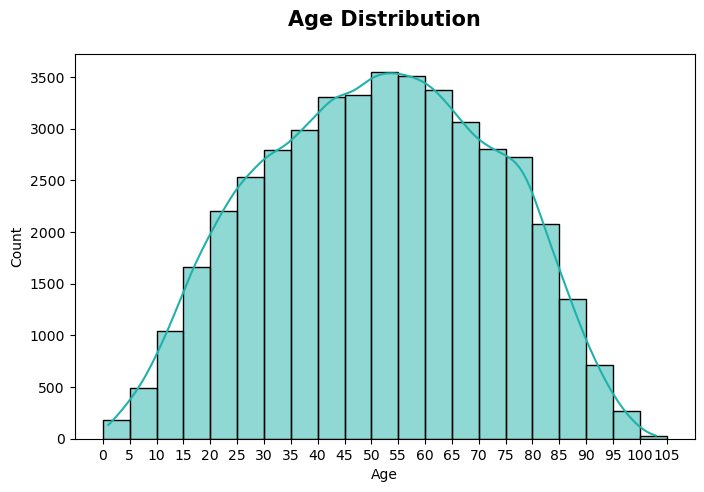

In [69]:
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], kde=True, color="#20B2AA",bins=np.arange(0,106,5))
plt.title("Age Distribution",weight = "bold", fontsize = 15, pad=20)
plt.xlabel("Age")
plt.xticks(np.arange(0,106,5))
plt.show()

### 2- Bmi outliers 


# Definition wisker function

In [72]:


def wisker (col) :
    q1,q3=np.percentile(col,[25,75])
    range_q=q3-q1
    lw=q1-1.5*range_q
    uw=q3+1.5*range_q
    return lw,uw

wisker(df['bmi'])

(13.35, 46.550000000000004)

In [73]:
# adjust rows with outliers

lw,um=wisker(df['bmi'])

df['bmi']=np.where(df['bmi']<lw,lw,df['bmi'])

df['bmi']=np.where(df['bmi']>um,um,df['bmi'])

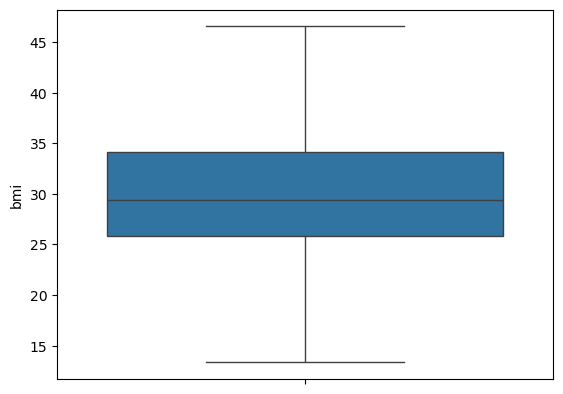

In [74]:
## check
sns.boxplot(df['bmi'])
plt.show()

### 3-Avg_glucose_level outliers

In [76]:
lower_bound,upper_bound = wisker(df['avg_glucose_level'])
print("lower_bound: ",lower_bound,"\nupper_bound: ",upper_bound)

lower_bound:  -42.88499999999998 
upper_bound:  280.755


In [77]:
## check num of glucose outlier 
((df['avg_glucose_level'] < lower_bound) | (df['avg_glucose_level'] > upper_bound)).sum()

0

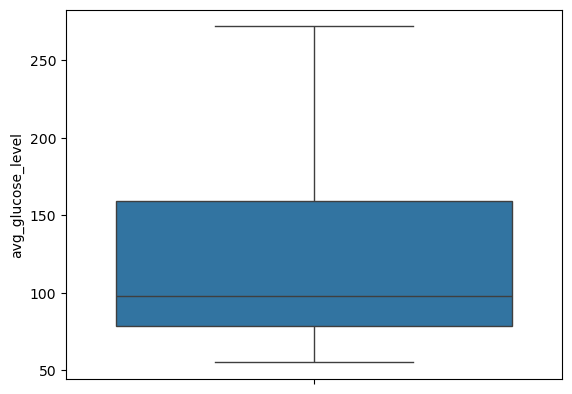

In [78]:
sns.boxplot(df['avg_glucose_level'])
plt.show()

In [79]:
df.to_csv('df_cleaned.csv', index=False)

<div style="background-color:#7B68EE; color:white; padding:20px; border-style: solid;
            border-color: #FF9B50;
            font-size:30px; font-weight:bold; border-radius:14px;">
    <span style="font-size:40px;">Data Visualization</span> 📊📈📉🖼️🎨🧠
</div>


## 1- Regression plot to identify Relationship between hypertension and stroke risk 📈

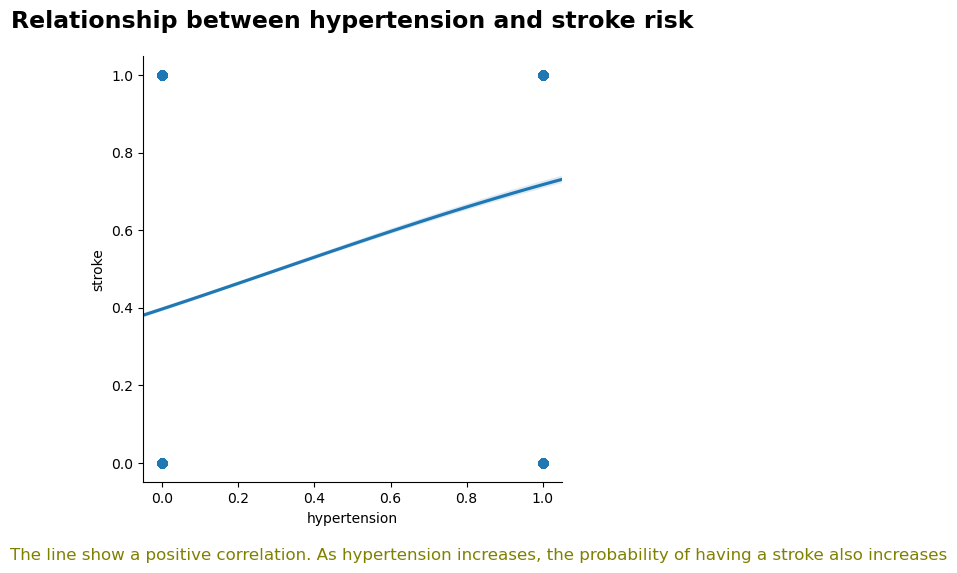

In [82]:


fig1= sns.lmplot(x='hypertension',y='stroke',data=df,logistic=True,truncate=False,palette=colors,)
plt.title("Relationship between hypertension and stroke risk",weight = "bold", fontsize = 17, pad=20)

plt.text(-0.4,-0.25,"The line show a positive correlation. As hypertension increases, the probability of having a stroke also increases",
         fontdict={'color':'#808000','fontsize':12})
plt.show()

<div style="padding:10px;
            color:#E55604;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #FF9B50;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>The line show a positive correlation. As hypertension increases, the probability of having a stroke also increases</b></div>


## 2- Regression plot to identify Relationship between heart_disease and stroke risk 📈

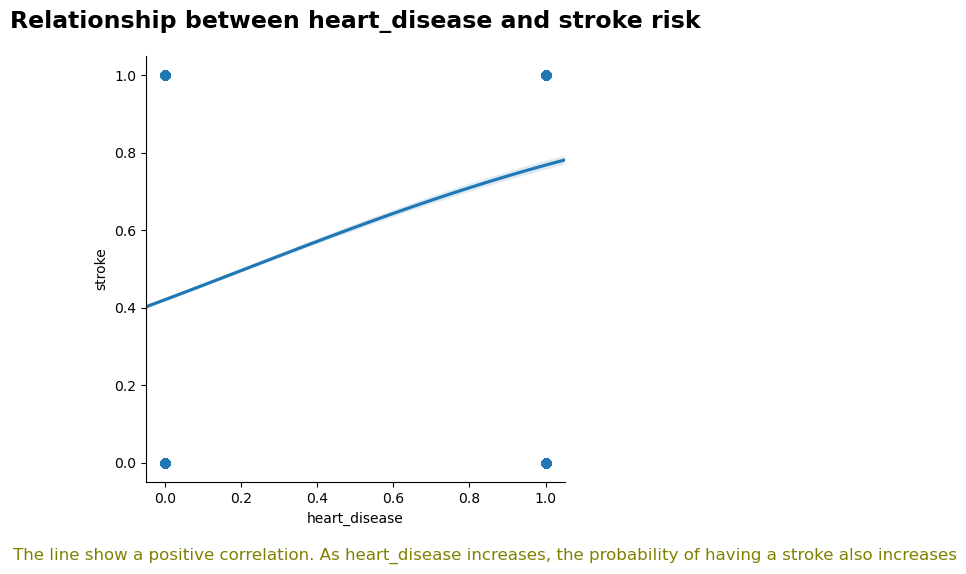

In [85]:


fig2=sns.lmplot(x='heart_disease',y='stroke',data=df,logistic=True,truncate=False)
plt.title("Relationship between heart_disease and stroke risk",weight = "bold", fontsize = 17, pad=20)

plt.text(-0.4,-0.25,"The line show a positive correlation. As heart_disease increases, the probability of having a stroke also increases",
        fontdict={'color':'#808000','fontsize':12})
plt.show()

<div style="padding:10px;
            color:#E55604;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #FF9B50;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>The line show a positive correlation. As heart_disease increases, the probability of having a stroke also increases</b></div>


## 3- Regression plot to identify Relationship between avg_glucose_level and stroke risk

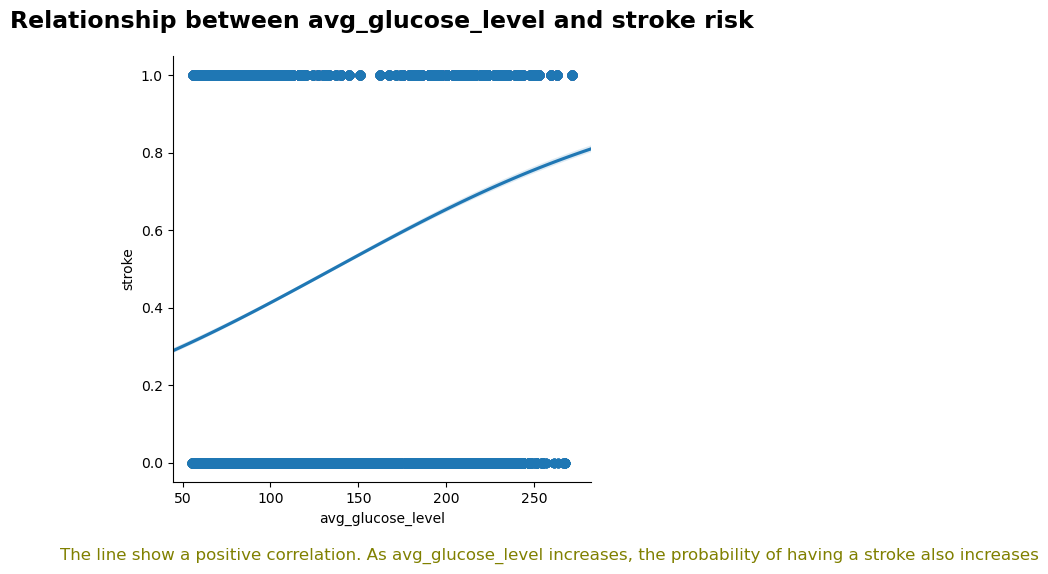

In [88]:



fig3=sns.lmplot(x='avg_glucose_level',y='stroke',data=df,logistic=True,truncate=False)
plt.title("Relationship between avg_glucose_level and stroke risk",weight = "bold", fontsize = 17, pad=20)

plt.text(-20,-0.25,"The line show a positive correlation. As avg_glucose_level increases, the probability of having a stroke also increases",
        fontdict={'color':'#808000','fontsize':12})
plt.show()

<div style="padding:10px;
            color:#E55604;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #FF9B50;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>The line show a positive correlation. As avg_glucose_level increases, the probability of having a stroke also increases</b></div>


## 4- Average Glucose Level: Histogram and Density Distribution 📊

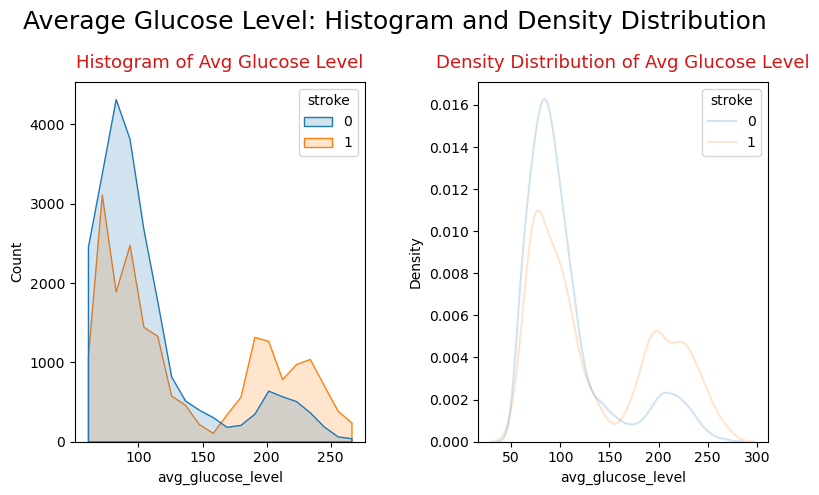

In [91]:

fig4=plt.figure(figsize=(8, 5))
plt.subplot(1, 2,1)
sns.histplot(data=df, x='avg_glucose_level', hue='stroke', element='poly',bins=20, alpha=0.2)
plt.title('Histogram of Avg Glucose Level',color="#D71313", fontsize = 13, pad=10)

plt.subplot(1, 2,2)
sns.kdeplot(data=df, x='avg_glucose_level', hue='stroke', common_norm=False,alpha=0.2)
plt.title('Density Distribution of Avg Glucose Level',color="#D71313", fontsize = 13, pad=10)

fig4.suptitle('Average Glucose Level: Histogram and Density Distribution',fontsize=18)
plt.subplots_adjust(left=0.2,right=0.3)
plt.tight_layout()
plt.show()

<div style="padding:10px;
            color:#E55604;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #FF9B50;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>The average glucose level distributions of stroke vs non-stroke cases are quite different. In particular,
the secondary peak at around 170-250 glucose level is higher in the case of stroke cases.</b></div>


## 5- Age: Histogram and Density Distribution

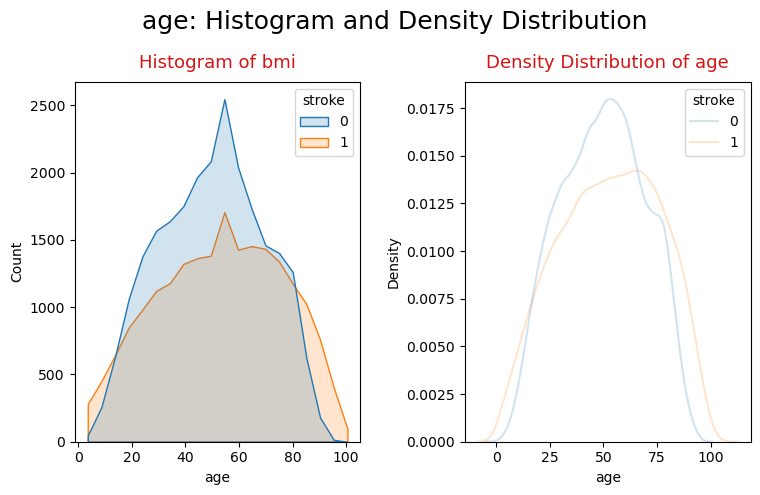

In [94]:
## Age: Histogram and Density Distribution

fig5=plt.figure(figsize=(8, 5))
plt.subplot(1, 2,1)
sns.histplot(data=df, x='age', hue='stroke', element='poly',bins=20, alpha=0.2)
plt.title('Histogram of bmi',color="#D71313", fontsize = 13, pad=10)

plt.subplot(1, 2,2)
sns.kdeplot(data=df, x='age', hue='stroke', common_norm=False,alpha=0.2)
plt.title('Density Distribution of age',color="#D71313", fontsize = 13, pad=10)

fig5.suptitle('age: Histogram and Density Distribution',fontsize=18)
plt.subplots_adjust(left=0.2,right=0.3)
plt.tight_layout()
plt.show()


<div style="padding:10px;
            color:#E55604;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #FF9B50;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>Stroke cases (stroke=1, orange) are more prevalent in middle-aged and older individuals (40+ years), aligning with known medical research that stroke risks increase with age.
            The density plot further confirms that stroke cases (stroke=1) peak around 80 to 100 years,
            This suggests that stroke is more common in older populations compared to younger individuals.</b></div>

## 6-Impact of Work Type on Stroke Incidence

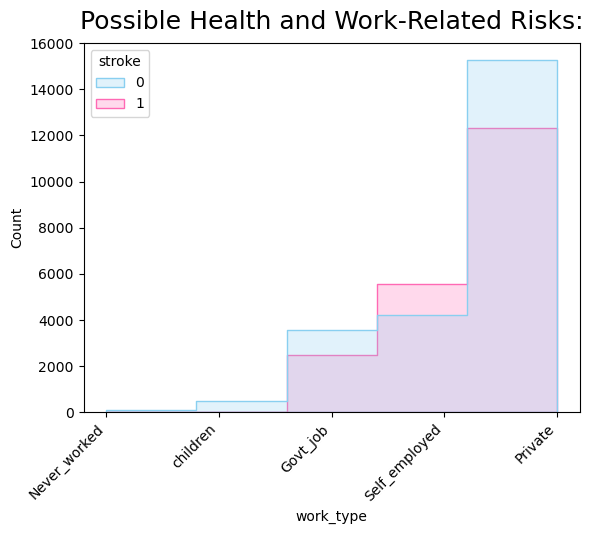

In [97]:
#Impact of Work Type on Stroke Incidence

fig6=sns.histplot(data=df, x="work_type",bins=20,binwidth=0.8,hue="stroke",element='step',palette= ["#89CFF0", "#FF69B4"])
plt.xticks(ticks=[0,1,2,3,4],labels=['Never_worked','children','Govt_job','Self_employed','Private'],rotation=45, ha="right")
plt.title('Possible Health and Work-Related Risks:', fontsize = 18, pad=10)
plt.show()


<div style="padding:10px;
            color:#E55604;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #FF9B50;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>The relatively higher stroke cases in "Self-employed" and "Private" sectors could indicate work-relatedstress or lifestyle factors contributing to health risks.
This insight might be useful for further research into workplace well-being and health management</b></div>

## 7-Impact of Marriage on Stroke Incidence

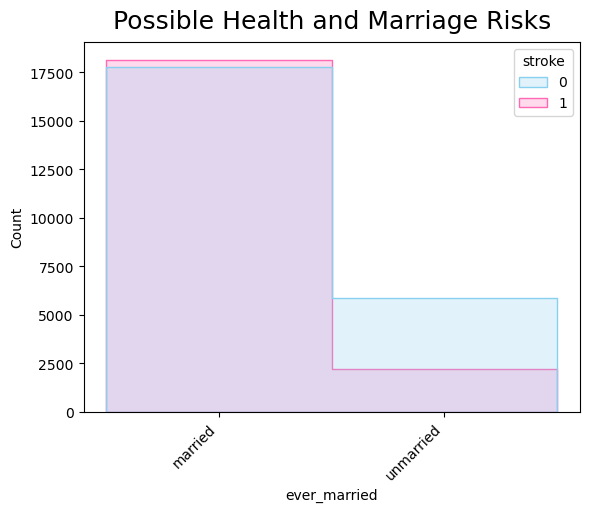

In [100]:
#Impact of Marriage on Stroke Incidence

copy_df=df.copy()
def transform_ever_married(df):
    if df['ever_married']==1 :
      return 'married'
    elif df['ever_married']==0 :
        return 'unmarried'

copy_df['ever_married']=df.apply(transform_ever_married,axis=1)

sns.histplot(data=copy_df, x="ever_married",bins=20,binwidth=0.8,hue="stroke",element='step',palette= ["#89CFF0", "#FF69B4"])
plt.xticks(rotation=45, ha="right")
plt.title('Possible Health and Marriage Risks', fontsize = 18, pad=10)
plt.show()

In [101]:
group_df=df.groupby(['ever_married','stroke']).size().reset_index(name='count')
group_df['ever_married'] = group_df['ever_married'].map({1: 'Married', 0: 'Unmarried'})
group_df['stroke'] = group_df['stroke'].map({1: 'have stroke', 0: 'not have stroke'})

group_df


ever_married           stroke  count
0    Unmarried  not have stroke   5871
1    Unmarried      have stroke   2220
2      Married  not have stroke  17756
3      Married      have stroke  18159

In [102]:
import plotly.express as px

px.sunburst(group_df,path=['ever_married','stroke'],values='count',title='stroke count by Marriage',height=500,width=700)


In [103]:
# Calculation the stroke percentage within each group of ever_married to understand the actual risk


married_yes_stroke=group_df[(group_df['ever_married']=='Married') & (group_df['stroke']=='have stroke')]['count'].sum()
unmarried_yes_stroke=group_df[(group_df['ever_married']=='Unmarried') & (group_df['stroke']=='have stroke')]['count'].sum()

count_married=group_df[group_df['ever_married']=='Married']['count'].sum()
count_unmarried=group_df[group_df['ever_married']=='Unmarried']['count'].sum()

percentage_married_yes_stroke=married_yes_stroke/count_married
percentage_unmarried_yes_stroke=unmarried_yes_stroke/count_unmarried
print('percentage of married who had stroke : ',percentage_married_yes_stroke)
print('percentage of unmarried who had stroke : ',percentage_unmarried_yes_stroke)


percentage of married who had stroke :  0.5056104691633022
percentage of unmarried who had stroke :  0.27437893956247683


<div style="padding:10px;
            color:#FF0000;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #000000;
            background-color:#FFFFFF;
            overflow:hidden;
            font-weight:400"><b> Through these percentages, we notice that the percentage of infected people is higher among married people
 but married individuals might be older on average, increasing their stroke risk or other factors
 (heart_disease, blood pressure, glucose levels)  we must Investigate this risk factors to check for correlationst</b></div>


In [105]:
risk_factors = ["age", "bmi","heart_disease", "avg_glucose_level", "hypertension"]

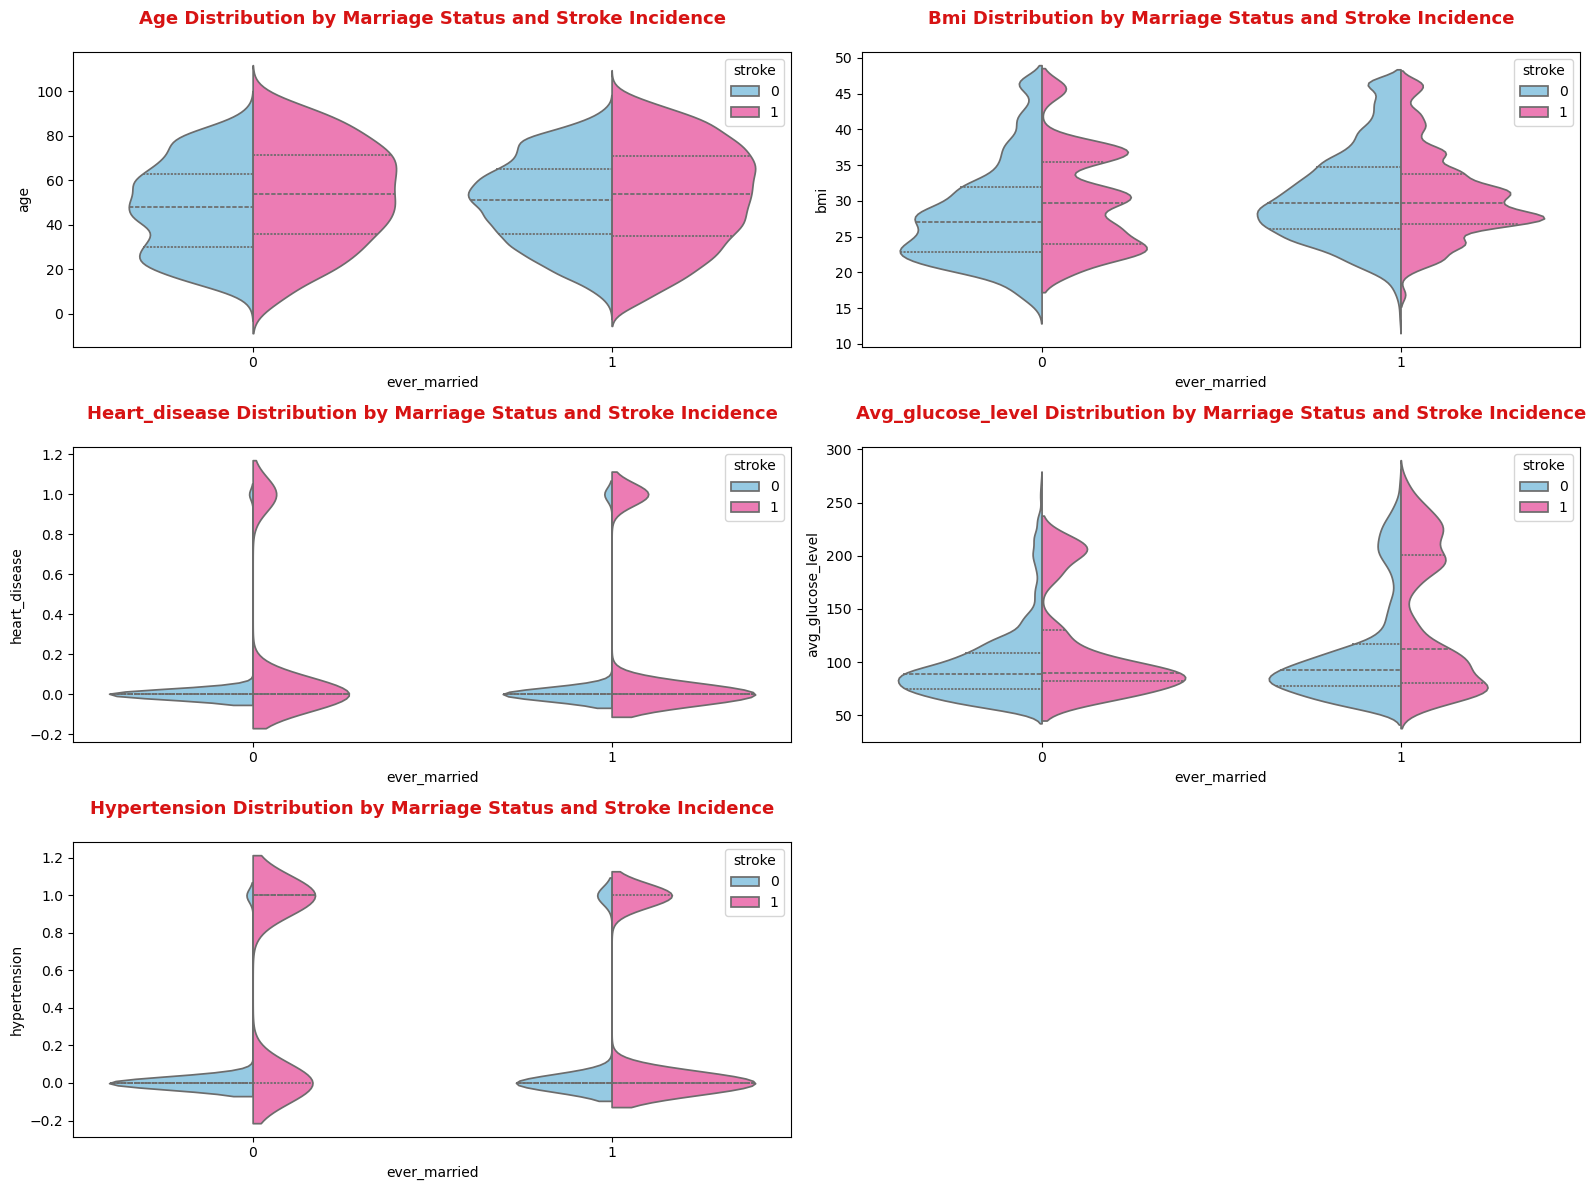

In [106]:

# Violin plots to compare distributions
plt.figure(figsize=(16, 12))

for i, factor in enumerate(risk_factors,1):
    plt.subplot(3,2,i)
    sns.violinplot(data=df, x="ever_married", y=factor, hue="stroke", split=True, inner="quart", palette=["#89CFF0", "#FF69B4"])
    plt.title(f"{factor.capitalize()} Distribution by Marriage Status and Stroke Incidence",weight = "bold", color = "#D71313", fontsize = 13, pad=20)

plt.tight_layout()
plt.show()


<div style="padding:10px;
            color:#E55604;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #FF9B50;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>Marriage itself is not necessarily a risk factor for stroke. Instead, age, glucose levels, and hypertension seem to be more significant contributors.
Married individuals might appear to have a higher stroke rate because they tend to be older
</b></div>



<div style="background-color:#7B68EE; color:white; padding:20px; border-style: solid;
            border-color: #FF9B50;
            font-size:30px; font-weight:bold; border-radius:14px;">
    <span style="font-size:40px;">Advanced Data Analysis</span> 📈💻🧠
</div>

## 1- T-tests for continuous variables between stroke and non-stroke groups

In [110]:
from scipy import stats

continuous_vars = ['age', 'avg_glucose_level', 'bmi']
for var in continuous_vars:
    stroke = df[df['stroke'] == 1][var]
    no_stroke = df[df['stroke'] == 0][var]
    t_stat, p_val = stats.ttest_ind(stroke, no_stroke, equal_var=False)
    print(f"T-test for {var}: t-statistic = {t_stat:.2f}, p-value = {p_val:.4f}")
    print('')

T-test for age: t-statistic = 15.04, p-value = 0.0000

T-test for avg_glucose_level: t-statistic = 57.01, p-value = 0.0000

T-test for bmi: t-statistic = 6.02, p-value = 0.0000



<div style="padding:10px;
            color:#E55604;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #FF9B50;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>All three continuous variables (age, avg_glucose_level, and BMI) showed strong statistically significant differences
between those with and without stroke. The meaning of this is:

People with stroke have a higher life expectancy.

They have a higher average glucose.

And they have a different BMI (often higher).

This analysis supports the idea that these factors are risk factors for stroke.
</b></div>



### 2- Chi-squared tests for categorical variables

In [113]:

categorical_vars = ['sex', 'hypertension', 'heart_disease', 'ever_married', 
                   'work_type', 'Residence_type', 'smoking_status']
for var in categorical_vars:
    contingency_table = pd.crosstab(df[var], df['stroke'])
    chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"Chi-square test for {var}: chi2 = {chi2:.2f}, p-value = {p_val:.4f}")
    print("")
    

Chi-square test for sex: chi2 = 287.02, p-value = 0.0000

Chi-square test for hypertension: chi2 = 2971.92, p-value = 0.0000

Chi-square test for heart_disease: chi2 = 2284.64, p-value = 0.0000

Chi-square test for ever_married: chi2 = 1419.08, p-value = 0.0000

Chi-square test for work_type: chi2 = 1040.44, p-value = 0.0000

Chi-square test for Residence_type: chi2 = 5.69, p-value = 0.0171

Chi-square test for smoking_status: chi2 = 208.64, p-value = 0.0000



<div style="padding:10px;
            color:#E55604;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #FF9B50;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>All categorical variables in the study are statistically correlated with stroke, as all p-values are less than 0.05,
indicating a significant relationship.

Important Notes:
The highest values were for hypertension and heart_disease → strongest stroke correlation.

Residence_type has less chi2, but it's still important because it's less than 0.05.

Variants such as gender, smoking_status, work_type have a clear relationship with stroke
</b></div>



### 3- Correlation of Stroke with Risk Factors

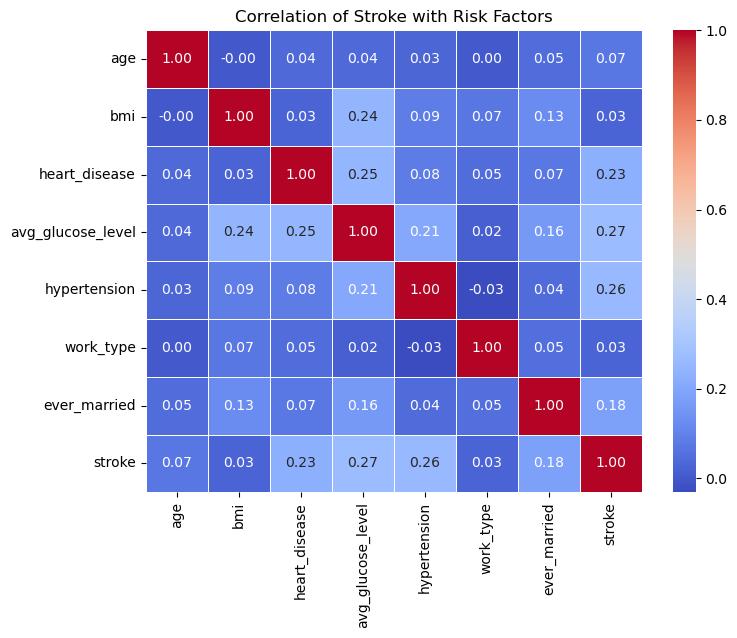

In [116]:

risk_factors = ["age", "bmi","heart_disease", "avg_glucose_level", "hypertension","work_type","ever_married"]
correlation = df[risk_factors + ["stroke"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation of Stroke with Risk Factors")
plt.show()

<div style="padding:10px;
            color:#E55604;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #FF9B50;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b> Correlation Heatmap Observations:
The highest correlation with stroke is average glucose level (0.27), followed by hypertension (0.26) followed by heart_disease(0.23).
Age has a weaker correlation with stroke (0.07), which suggests that while older individuals are more at risk, other factors might play a bigger role.
BMI has the weakest correlation (0.03), indicating that weight alone may not be a strong predictor of stroke in this dataset.
</b></div>


In [118]:
df.to_csv('enhanced_stroke_data.csv', index=False)

<div style="background-color:#7B68EE; color:white; padding:20px; border-style: solid;
            border-color: #FF9B50;
            font-size:30px; font-weight:bold; border-radius:14px;">
    <span style="font-size:35px;">Machine Learning Model Development and Optimization </span> 🤖
</div>

<div style="padding:10px;
            color:#7B68EE;
            margin:10px;
            font-size:180%;
            display:fill;
            background-color:#FFFFFF;
            overflow:hidden;
            font-weight:400"><b> Import libraries 📚</b></div>



In [121]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score,f1_score, classification_report, confusion_matrix

<div style="padding:10px;
            color:#7B68EE;
            margin:10px;
            font-size:180%;
            display:fill;
            background-color:#FFFFFF;
            overflow:hidden;
            font-weight:400"><b> Features Separating ✂️</b></div>



In [123]:
X = df.drop('stroke', axis=1)  # split features
y = df['stroke']  # split target


<div style="padding:10px;
            color:#7B68EE;
            margin:10px;
            font-size:180%;
            display:fill;
            background-color:#FFFFFF;
            overflow:hidden;
            font-weight:400"><b>  split X and y into training and testing sets 📁 / 📂</b></div>



In [125]:
#(80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 <div style="padding:10px;
            color:#7B68EE;
            margin:10px;
            font-size:180%;
            display:fill;
            background-color:#FFFFFF;
            overflow:hidden;
            font-weight:400"><b> Feature Scaling 📏⚖️📐</b></div>



In [127]:
cols = X_train.columns

In [128]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train) 

X_test = scaler.transform(X_test)


In [129]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [130]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [131]:
X_train.head()

sex       age hypertension heart_disease ever_married work_type  \
0 -1.091614  1.400408     1.968045     -0.374348     0.473486  0.685465   
1 -1.091614  1.915966    -0.508119      2.671309     0.473486  0.685465   
2 -1.091614 -0.427476    -0.508119     -0.374348     0.473486 -1.855723   
3  0.916075 -0.146263    -0.508119     -0.374348    -2.111995 -0.585129   
4  0.916075  1.775359    -0.508119     -0.374348     0.473486 -0.585129   

  Residence_type avg_glucose_level       bmi smoking_status  
0       0.971876          1.602248  2.162937       1.028821  
1      -1.028938          1.332126  0.966578       1.028821  
2      -1.028938          1.914726  0.764595       1.028821  
3      -1.028938         -0.834831  2.528060       1.028821  
4       0.971876          0.215783 -1.037712       1.028821

 <div style="padding:10px;
            color:#7B68EE;
            margin:10px;
            font-size:180%;
            display:fill;
            background-color:#FFFFFF;
            overflow:hidden;
            font-weight:400"><b>  apply different Algorithem on data 🤖🧠⚙️💻</b></div>



In [133]:
Algorithem=['LogisticRegression','RandomForestClassifier','GradientBoostingClassifier','SVC','KNeighborsClassifier']
result1=[]
result2=[]
result3=[]

In [134]:

def call_model(model):
    
    model.fit(X_train,y_train)  # fit classifier to training set
    y_pred=model.predict(X_test)  # make predictions on test set
    
    accuracy=accuracy_score(y_pred,y_test) # compute accuracy score
    recall=recall_score(y_pred,y_test)
    f1=f1_score(y_pred,y_test)
    cm = confusion_matrix(y_test, y_pred) # compute confusion_matrix score

    cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

    sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')   # visualize confusion matrix with seaborn heatmap
    plt.show()
   
    
    result1.append(accuracy)
    result2.append(recall)
    result3.append(f1)
    print('\nmodel is : ',model)
    print("")
    print(classification_report(y_test, y_pred))

## 1- LogisticRegression

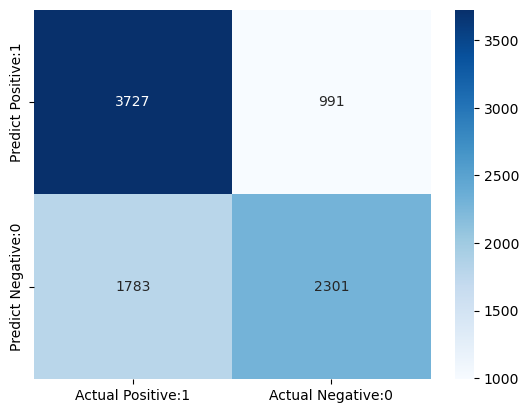


model is :  LogisticRegression()

              precision    recall  f1-score   support

           0       0.68      0.79      0.73      4718
           1       0.70      0.56      0.62      4084

    accuracy                           0.68      8802
   macro avg       0.69      0.68      0.68      8802
weighted avg       0.69      0.68      0.68      8802



In [136]:
## LogisticRegression

model1=LogisticRegression()
call_model(model1)

## 2-RandomForestClassifier

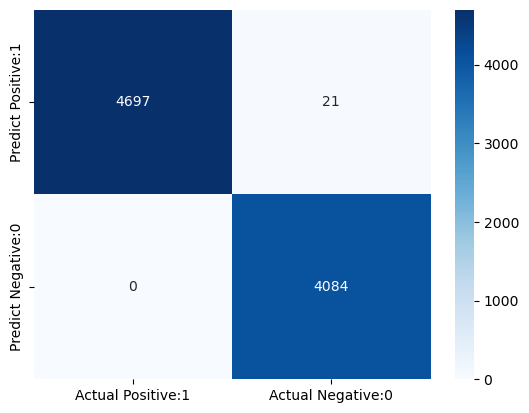


model is :  RandomForestClassifier(random_state=42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4718
           1       0.99      1.00      1.00      4084

    accuracy                           1.00      8802
   macro avg       1.00      1.00      1.00      8802
weighted avg       1.00      1.00      1.00      8802



In [138]:
# RandomForestClassifier

model2 = RandomForestClassifier(n_estimators=100, random_state=42)
call_model(model2)

## 3-GradientBoosting

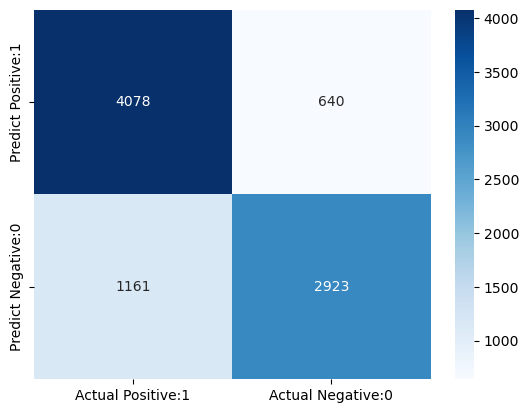


model is :  GradientBoostingClassifier(random_state=42)

              precision    recall  f1-score   support

           0       0.78      0.86      0.82      4718
           1       0.82      0.72      0.76      4084

    accuracy                           0.80      8802
   macro avg       0.80      0.79      0.79      8802
weighted avg       0.80      0.80      0.79      8802



In [140]:
## GradientBoosting

model3 = GradientBoostingClassifier(n_estimators=100, random_state=42)
call_model(model3)

## 4-SVC

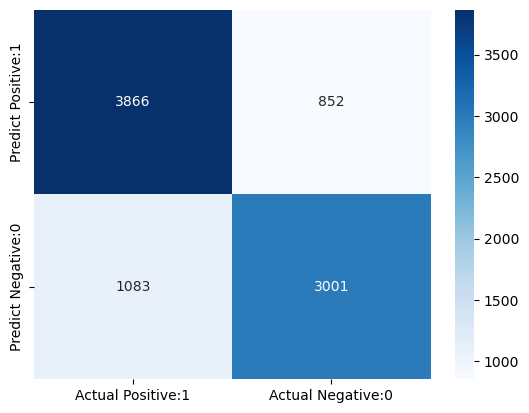


model is :  SVC()

              precision    recall  f1-score   support

           0       0.78      0.82      0.80      4718
           1       0.78      0.73      0.76      4084

    accuracy                           0.78      8802
   macro avg       0.78      0.78      0.78      8802
weighted avg       0.78      0.78      0.78      8802



In [142]:
## SVC
model4=SVC()
call_model(model4)

## 5-KNeighborsClassifier

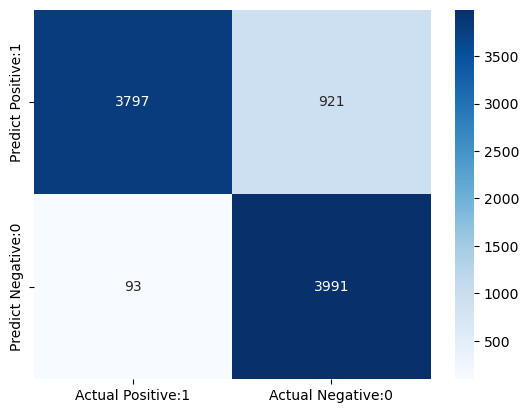


model is :  KNeighborsClassifier()

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      4718
           1       0.81      0.98      0.89      4084

    accuracy                           0.88      8802
   macro avg       0.89      0.89      0.88      8802
weighted avg       0.90      0.88      0.88      8802



In [144]:
## KNeighborsClassifier
model5=KNeighborsClassifier()
call_model(model5)


 <div style="padding:10px;
            color:#7B68EE;
            margin:10px;
            font-size:180%;
            display:fill;
            background-color:#FFFFFF;
            overflow:hidden;
            font-weight:400"><b> Comparison of Machine Learning Algorithms 🤖 </b></div>



In [146]:
pd.DataFrame({'Algorithem':Algorithem,'Accuracy':result1,'Recall':result2,'f1_score':result3})

Algorithem  Accuracy    Recall  f1_score
0          LogisticRegression  0.684844  0.698967  0.623915
1      RandomForestClassifier  0.997614  0.994884  0.997436
2  GradientBoostingClassifier  0.795387  0.820376  0.764483
3                         SVC  0.780164  0.778874  0.756205
4        KNeighborsClassifier  0.884799  0.812500  0.887283

<div style="padding:10px;
            color:#E55604;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #FF9B50;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b> the best model is RandomForestClassifier (model2)
</b></div>



<div style="padding:10px;
            color:#7B68EE;
            margin:10px;
            font-size:180%;
            display:fill;
            background-color:#FFFFFF;
            overflow:hidden;
            font-weight:400"><b> Check for overfitting and underfitting ⚠️ </b></div>

## 1- check training and test Accuracy

In [150]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model2.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model2.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9976


## 2- check Cross-validation Accuracy

In [152]:
# check Cross-validation Accuracy

from sklearn.model_selection import cross_val_score 
scores=cross_val_score(model2,X,y,cv=5)
print ("Average cv accuracy:",scores.mean())

Average cv accuracy: 0.9964322959003569


In [153]:
# check class distribution in test set

y_test.value_counts()

stroke
0    4718
1    4084
Name: count, dtype: int64

## 3-check null accuracy score

In [155]:
# check null accuracy score

null_accuracy = (4718/(4718+4084))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.5360


### We can see that our model test accuracy score is 0.9976 and Training set score: 1.0000  and null accuracy score is 0.0.5360. So, we can conclude that our RandomForestClassifier is doing a very good job in predicting the class labels.

<div style="padding:10px;
            color:#E55604;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #FF9B50;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>"The RandomForestClassifier neither suffers from overfitting nor underfitting. It is performing excellently on both training and test sets.
</b></div>



<div style="padding:10px;
            color:#7B68EE;
            margin:10px;
            font-size:180%;
            display:fill;
            background-color:#FFFFFF;
            overflow:hidden;
            font-weight:400"><b>Hyperparameter Optimization using GridSearch CV  🔧🔧</b></div>

In [159]:
from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [10,50,100, 150,200, 300],             
#     'max_depth': [None, 5,10, 15,20],            
#     'min_samples_split': [2, 5, 10],            
#     'min_samples_leaf': [1, 2, 4],              
#     'max_features': ['auto', 'sqrt', 'log2'],   
#     'bootstrap': [True, False],                 
#     'criterion': ['gini', 'entropy']             
# }
param_grid = {
    'n_estimators': [10,50, 100],                
    'max_depth': [None, 10],                  
    'min_samples_split': [2, 5],              
    'min_samples_leaf': [1, 2],               
    'max_features': ['sqrt', 'log2'],         
    'bootstrap': [True],                    
    'criterion': ['gini']                     
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator = rf,  
                           param_grid = param_grid,
                           n_jobs=-1,
                           verbose=2,
                           scoring = 'accuracy',
                           cv = 5,
                           )


grid_search.fit(X_train, y_train)


print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.9965628792720558


In [160]:
prediction = model2.predict(scaler.transform(np.array([[1.0 ,63.0 ,0 ,1 ,1 , 4, 1 ,228.69 ,36.6 ,1]])))
print("prediction is : ",prediction)

prediction is :  [1]


In [161]:
prediction = model2.predict(scaler.transform(np.array([[1.0	,22.0	,0	,0	,0	,4	,1	,91.19	,28.3,	0]])))
print("prediction is : ",prediction)

prediction is :  [0]


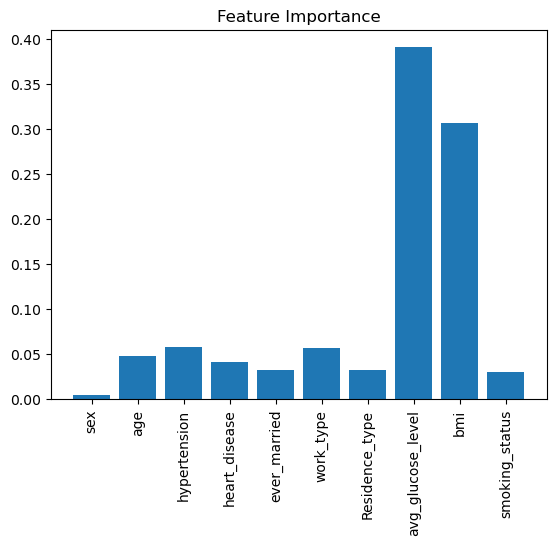

In [162]:
importance = model2.feature_importances_
plt.bar(df.drop('stroke',axis = 1).columns, importance)
plt.title("Feature Importance")
plt.xticks(rotation = 90)
plt.show()

In [163]:
prediction = model2.predict_proba(scaler.transform(np.array([[1.0	,22.0	,0	,0	,0	,4	,1	,91.19	,40.3,	0]])))
print("prediction is : ",prediction)

prediction is :  [[0.92 0.08]]


In [166]:
from sklearn.neural_network import MLPClassifier
ann_model = MLPClassifier(hidden_layer_sizes = (100,50), max_iter = 500, random_state = 42)
ann_model.fit(X_train,y_train)

# Make predictions and evaluate 
mlp_predictions = ann_model.predict(X_test)

ann_accuracy = accuracy_score(y_test,mlp_predictions)

In [168]:
print(ann_accuracy)

0.9729606907521018
